# Chapter 4

## 4.2.1 均方誤差 (Mean Squared Error)

In [ ]:
# 均方根函數
import numpy as np

# y為預測輸出，t為正確答案
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [ ]:
# 假設正確答案為"2"

t = [0,0,1,0,0,0,0,0,0,0]

# 例一："2"的機率為最高時(0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print('Example 1 - MSE: ', mean_squared_error(np.array(y), np.array(t)))

# 例二："7"的機率為最高時(0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print('Example 2 - MSE: ', mean_squared_error(np.array(y), np.array(t)))

print('As you could imagine, MSE of example 2 is higher than the one of example 1.')

## 4.2.2 交叉熵誤差 (Cross Entropy Error)

In [ ]:
# 建立交叉熵函數
import numpy as np

def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [ ]:
t = [0,0,1,0,0,0,0,0,0,0]

# 例一："2"的機率為最高時(0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print('Example 1 - Cross Entropy Error: ', cross_entropy_error(np.array(y), np.array(t)))

# 例二："7"的機率為最高時(0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print('Example 2 - Cross Entropy Error: ', cross_entropy_error(np.array(y), np.array(t)))

## 4.2.3 小批次學習

In [ ]:
import sys, os, numpy as np,
from TextbookProgram.mnist import load_mnist

sys.path.append(os.pardir)

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

In [ ]:
# Numpy 的 random choice 方法
import numpy as np

random_choice_demo = np.random.choice(60000, 10)
print(random_choice_demo)

In [ ]:
# 以Numpy隨機取出10張訓練資料，建立小樣本

train.size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

## 4.2.4 以"批次對應版"執行交叉熵誤差

## (待完成)

In [1]:
# 建立新的交叉熵函數
import numpy as np

def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

## 4.2.5 為什麼要設定損失函數？
    展開神經網路的學習時，不可以把辨識準確度當作"指標"的理由，是因為當辨識度變成指標時，在任何位置，參數微分後幾乎都會變成0

## 4.3.2 數值微分的範例

In [18]:
# 建立數值微分函數

def numerical_diff(f,x):
    h = 1e-4 # 10^(-4) = 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [19]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

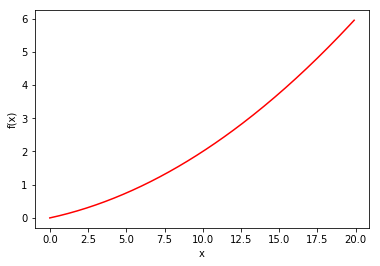

In [20]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 建立從0到10間隔為0.1的x陣列
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y, 'r')
plt.show()

In [21]:
# 在x=5及x=10時，分別計算此函數的微分
print('X=5時的數值微分', numerical_diff(function_1, 5))
print('X=10時的數值微分', numerical_diff(function_1, 10))

X=5時的數值微分 0.1999999999990898
X=10時的數值微分 0.2999999999986347


## 4.3.3 偏微分

In [22]:
# 建立有兩個變數的函式

def function_2(x):
    return x[0]**2 + x[1]**2
    # 或 return np.sum(x**2)

In [23]:
# 建立偏微分的函式 - x[0]=3, x[1]=4
# 偏微分x[0]時的改寫
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print('對x[0]進行偏微分時', numerical_diff(function_tmp1, 3))

# 偏微分x[1]時的改寫
def function_tmp2(x1):
    return 3**2 + x1*x1

print('對x[1]進行偏微分時', numerical_diff(function_tmp2, 4))

對x[0]進行偏微分時 6.00000000000378
對x[1]進行偏微分時 7.999999999999119


## 4.4 梯度

In [27]:
# 一次進行所有變數的偏微分
import numpy as np

def numerical_gradient(f,x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 產生和x同形狀的陣列
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # 計算f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # 計算f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 恢復原值
    
    return grad

In [28]:
# 使用Numerical Gradient進行多變數的微分
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


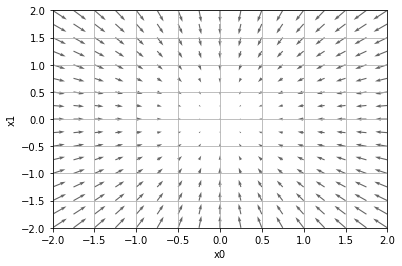

In [29]:
# 使用官網提供的python程式繪製2D梯度圖：f(x[0],x[1]) = x[0]**2 + x[1]**2

# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

## 4.4.1 梯度法

In [69]:
# 建立梯度下降法函式
# f:需最佳化的函數；init_x：預設值；lr：learning rate；step_num：使用梯度法重復的步鄹
import numpy as np

def numerical_gradient(f,x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 產生和x同形狀的陣列
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # 計算f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # 計算f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 恢復原值
    
    return grad

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x = x - lr * grad
        
    return x

In [66]:
# 利用梯度法求出f(x[0],x[1]) = x[0]**2 + x[1]**2的最小值

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])

print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


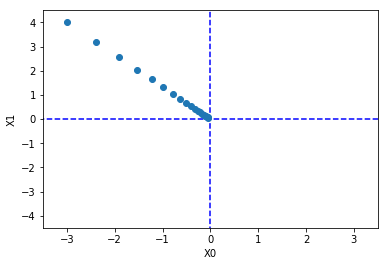

In [67]:
# 使用官網提供的python程式繪製梯度下降法的過程

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from TextbookProgram.gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [72]:
# 學習率太大的範例
init_x = np.array([-3.0, 4.0])
lr_too_large = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)
print(lr_too_large)

# 學習率太小的範例
init_x = np.array([-3.0, 4.0])
lr_too_small = gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)
print(lr_too_small)

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


## 4.4.2 神經網路的梯度

In [5]:
# 建立簡單神經網路模型：Simple Net
import sys, os
sys.path.append(os.pardir)  # Set import location
import numpy as np
from TextbookProgram.functions import softmax, cross_entropy_error
from TextbookProgram.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)  # 以常態初始化
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [12]:
net = simpleNet()
print(net.W) # 權重參數

[[ 0.14588946 -0.53883432  0.87118399]
 [ 1.39793912  1.56191698 -0.53683137]]


In [13]:
# 測試神經網路模型

x = np.array([0.6,0.9])
p = net.predict(x)
print('Predicted value od p: ', p)
print('最大值的索引值：', np.argmax(p))

t = np.array([0,0,1]) # 正確答案標簽
print('Loss: ', net.loss(x,t))

Predicted value od p:  [1.34567889 1.0824247  0.03956216]
最大值的索引值： 0
Loss:  2.018779659154715


In [15]:
# 計算梯度

def f(w):
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print('列印各權重的梯度：', dW)

列印各權重的梯度： [[ 0.29420159  0.22610761 -0.5203092 ]
 [ 0.44130239  0.33916141 -0.7804638 ]]


In [17]:
# 使用lambda來設定簡單的函數

f = lambda w: net.loss(x,t)
dW = numerical_gradient(f, net.W)
print('dW: ', dW)

dW:  [[ 0.29420159  0.22610761 -0.5203092 ]
 [ 0.44130239  0.33916141 -0.7804638 ]]


## 4.5.1 雙層神經網路的類別

In [4]:
import sys, os
import numpy as np
from TextbookProgram.functions import *
from TextbookProgram.gradient import numerical_gradient

class TwoLayerNet:
    
    # __init__進行初始化，引數：輸入層的神經元數量、隱藏層的神經元數量、輸出層的神經元數量
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 權重初始化
        # params：維持神經網路參數字典變數（實例變數）
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    # 預測函數，x市屬
    def predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)
        
        return y
    
    # 計算損失函數
    # x:輸入資料，t:訓練資料(正確資料)
    def loss(self,x,t):
        y = self.predict(x)
        
        return cross_entropy_error(y,t)
    
    # 計算辨識準確度
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 計算權重參數的梯度
    # x:輸入資料，t:訓練資料(正確資料)
    # grads：維持梯度的字典變數（numerical_gradient的回傳值）
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        
        grads={}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads    

In [5]:
# 範例一
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print('Shape of W1 is',net.params['W1'].shape)
print('Shape of b1 is',net.params['b1'].shape)
print('Shape of W2 is',net.params['W2'].shape)
print('Shape of b2 is',net.params['b2'].shape)

# 範例一的推論
x = np.random.rand(100, 784)
y = net.predict(x)

Shape of W1 is (784, 100)
Shape of b1 is (100,)
Shape of W2 is (100, 10)
Shape of b2 is (10,)


In [8]:
# 範例二
x = np.random.rand(100,784) # 虛擬輸入資料
t = np.random.rand(100,10) # 虛擬正確答案標簽

grads = net.numerical_gradient(x,t) # 計算梯度

print('Shape of gradient of W1 is ', grads['W1'].shape)
print('Shape of gradient of b1 is ', grads['b1'].shape)
print('Shape of gradient of W2 is ', grads['W2'].shape)
print('Shape of gradient of b2 is ', grads['b2'].shape)

Shape of gradient of W1 is  (784, 100)
Shape of gradient of b1 is  (100,)
Shape of gradient of W2 is  (100, 10)
Shape of gradient of b2 is  (10,)


## 4.5.2 執行小批次學習

### （需要更新實測）

In [1]:
import numpy as np
from TextbookProgram.mnist import load_mnist
from TextbookProgram.two_layer_net import TwoLayerNet

(x_train,t_train), (x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 設定超參數
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_sizee=50, output_size=10)

for i in range(iters_num):
    # 取得小批次
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 計算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)  # 高速版
    
    # 更新參數
    for ley in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] = network.params[key] - learning_rate * grad[key]
    
    # 記錄學習過程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.appned(loss)

ModuleNotFoundError: No module named 'TextbookProgram.mnist'

## 4.5.3 利用測試資料評估

In [3]:
import numpy as np
from TextbookProgram.mnist import load_mnist
from TextbookProgram.two_layer_net import TwoLayerNet

(x_train,t_train), (x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 新增加的部分
train_acc_list = []
test_acc_list = []
# 每 1 epoch 的重復次數
iter_per_epoch = max(train/batch_size, 1)

# 設定超參數
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_sizee=50, output_size=10)

for i in range(iters_num):
    # 取得小批次
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 計算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)  # 高速版
    
    # 更新參數
    for ley in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] = network.params[key] - learning_rate * grad[key]
    
    # 記錄學習過程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.appned(loss)
    
    # 新增加的部分：計算 1 epoch 的便是準確度
    if 1 % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ',' + str(test_acc))

ModuleNotFoundError: No module named 'TextbookProgram.mnist'